In [1]:
import pandas as pd
import numpy as np

In [2]:
df_obesidade = pd.read_csv("db/obesity-cleaned.csv")

### Analisando dados da tabela

In [3]:
df_obesidade

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


### Obesity (%) possui valores vazios, esta como string e possui desvio padrão no dado

In [4]:
df_obesidade["Obesity (%)"].value_counts()

No data            504
0.4 [0.1-1.0]       55
0.6 [0.2-1.3]       47
0.3 [0.1-0.7]       46
0.3 [0.1-0.8]       46
                  ... 
9.5 [6.7-13.1]       1
4.4 [2.2-7.6]        1
14.1 [9.1-20.3]      1
9.8 [6.9-13.4]       1
4.7 [2.5-8.0]        1
Name: Obesity (%), Length: 16375, dtype: int64

In [5]:
df_obesidade["Obesity (%)"].iloc[0]

'0.5 [0.2-1.1]'

In [6]:
df_obesidade.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

### Remoção da coluna 'Unnamed: 0', remoção do desvio padrão na coluna obesity

In [7]:
del df_obesidade['Unnamed: 0']

In [8]:
df_obesidade["Obesity"] = df_obesidade["Obesity (%)"].apply(lambda x: x.split()[0])
df_obesidade["Obesity"].value_counts()

No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
60.1      1
56.3      1
59.8      1
55.5      1
46.5      1
Name: Obesity, Length: 602, dtype: int64

### Remover valores "No" da coluna obesity

In [9]:
df_obesidade.loc[df_obesidade["Obesity"] == "No", "Obesity"] = np.nan #converter para nan

In [10]:
df_obesidade["Obesity"] = df_obesidade["Obesity"].dropna()

In [11]:
df_obesidade["Obesity"].value_counts()

0.4     222
0.6     218
0.5     217
0.7     210
0.8     201
       ... 
62.1      1
56.8      1
54.1      1
60.0      1
46.5      1
Name: Obesity, Length: 601, dtype: int64

### Converter para float "Obesity" e int "Year"

In [12]:
df_obesidade["Obesity"] = df_obesidade["Obesity"].apply(lambda x: float(x))
df_obesidade["Year"] = df_obesidade["Year"].apply(lambda x: int(x))

In [13]:
df_obesidade

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


### Definindo "Year" como index

In [14]:
df_obesidade.set_index("Year", inplace=True)

In [15]:
df_obesidade

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


### Busca da média de obesidade por ano (2015) separado por sexo

In [16]:
df_obesidade[df_obesidade.index == 2015].groupby("Sex").mean()

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


### Definindo um período de busca

In [17]:
df_obesidade_start = df_obesidade[df_obesidade.index == 1975]
df_obesidade_end = df_obesidade[df_obesidade.index == 2016]

### Definindo index como "Country"

In [18]:
df_obesidade_start.set_index("Country", inplace=True)
df_obesidade_end.set_index("Country", inplace=True)

### Buscando ambos os sexos

In [19]:
df_obesidade_end[df_obesidade_end["Sex"] == "Both sexes"]["Obesity"]

Country
Afghanistan                            5.5
Albania                               21.7
Algeria                               27.4
Andorra                               25.6
Angola                                 8.2
                                      ... 
Venezuela (Bolivarian Republic of)    25.6
Viet Nam                               2.1
Yemen                                 17.1
Zambia                                 8.1
Zimbabwe                              15.5
Name: Obesity, Length: 195, dtype: float64

### Calculando evolução da obesidade no período avaliado

In [20]:
df_obesidade_evolucao = df_obesidade_end[df_obesidade_end["Sex"] == "Both sexes"]["Obesity"] - df_obesidade_start[df_obesidade_start["Sex"] == "Both sexes"]["Obesity"]

In [21]:
df_obesidade_evolucao.sort_values().dropna().head() ## maior evolução, retirado países sem dados

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [22]:
df_obesidade_evolucao.sort_values().dropna().tail() ## menor evolução, retirado países sem dados

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

### Países com menor e maior evolução na taxa de obesidade

In [23]:
df_obesidade_end[df_obesidade_end.index == "Tuvalu"]

,Obesity (%),Sex,Obesity
Country,,,
Tuvalu,51.6 [45.0-57.9],Both sexes,51.6
Tuvalu,47.0 [37.7-56.4],Male,47.0
Tuvalu,56.2 [47.3-64.4],Female,56.2


In [24]:
df_obesidade_end[df_obesidade_end.index == "Viet Nam"]

,Obesity (%),Sex,Obesity
Country,,,
Viet Nam,2.1 [1.4-3.1],Both sexes,2.1
Viet Nam,1.6 [0.8-2.8],Male,1.6
Viet Nam,2.6 [1.5-4.2],Female,2.6


### Busca do país com maior e menor índice de obesidade no ano de 2015

In [25]:
df_2015 = df_obesidade[df_obesidade.index == 2015]
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [26]:
df_2015 = df_obesidade[df_obesidade.index == 2015]
df_2015[df_2015["Obesity"] == df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


### Buscar a diferença entre obesidade, durante os anos no Brazil

In [27]:
df_brazil = df_obesidade[df_obesidade["Country"] == "Brazil"]

<AxesSubplot:xlabel='Year'>

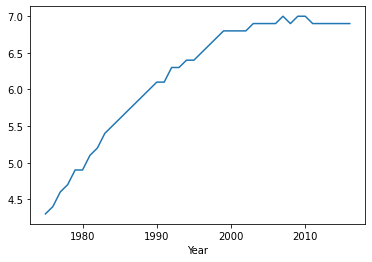

In [28]:
(df_brazil[df_brazil["Sex"] == "Female"]["Obesity"] - df_brazil[df_brazil["Sex"] == "Male"]["Obesity"]).plot()

Mulheres tem se tornado mais obesas em relação aos homens

### Comportamento da obesidade ano a ano

<AxesSubplot:xlabel='Year'>

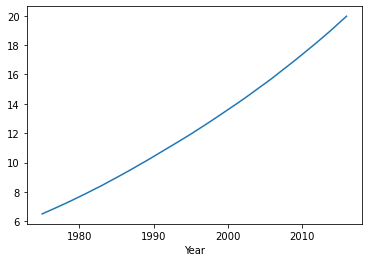

In [29]:
df_both = df_obesidade[df_obesidade["Sex"] == "Both sexes"]
df_both.groupby("Year")["Obesity"].mean().plot()